# ENTRENAMIENTO DE RED NEURONAL PARA CLASIFICACIÓN DE AGUA POTABLE

## DATASET : [KAGGLE](https://www.kaggle.com/datasets/adityakadiwal/water-potability)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import kagglehub
from kagglehub import KaggleDatasetAdapter
from pathlib import Path

# CARGAMOS EL DATASET

In [2]:
# Descarga el dataset y convierte la ruta a tipo Path
dataset_path = Path(kagglehub.dataset_download("adityakadiwal/water-potability"))

# Usamos operador / entre objetos Path para formar la ruta completa
csv_file_path = dataset_path / "water_potability.csv"

# Leemos el archivo con pandas
df = pd.read_csv(csv_file_path)

# Mostramos las primeras filas
df.head(5)

100%|██████████| 251k/251k [00:00<00:00, 14.1MB/s]

Extracting files...


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# EDA

In [3]:
df.dtypes

,0
ph,float64
Hardness,float64
Solids,float64
Chloramines,float64
Sulfate,float64
Conductivity,float64
Organic_carbon,float64
Trihalomethanes,float64
Turbidity,float64
Potability,int64


In [4]:
df.shape

(3276, 10)

In [5]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


# IMPUTACIÓN DE DATOS FALTANTES

In [6]:
for col in ['ph','Sulfate','Trihalomethanes']:
  df[col].fillna(df[col].mean(),inplace=True)

df.isnull().sum()

<ipython-input-6-ff102022af7b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)


,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [7]:
df['Potability'].value_counts()

,count
Potability,
0,1998
1,1278


# CREAMOS VARIABLE DEPENDIENTE E INDEPENDIENTE

In [8]:
X = df.iloc[:,0:9].values
y = df.iloc[:,9].values

# ESCALAMIENTO DE DATOS

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# DIVIDIMOS DATASET EN ENTRENAMIENTO Y PRUEBA

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

# CREAMOS RED NEURONAL CON TENSORFLOW Y KERAS

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [12]:
red = Sequential()
entrada = Dense(units=9,activation='relu')
oculta1 = Dense(units=500,activation='relu')
oculta2 = Dense(units=500,activation='relu')
salida = Dense(units=1,activation='sigmoid')

red.add(entrada)
red.add(oculta1)
red.add(Dropout(0.5))
red.add(oculta2)
red.add(salida)

red

<Sequential name=sequential, built=False>

# CONFIGURAMOS LA RED CON UN OPTIMIZADOR

In [13]:
red.compile(
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

# ENTRENAMOS LA RED NEURONAL

In [14]:
model1 = red.fit(X_train,y_train,batch_size=30,epochs=9)

Epoch 1/9
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5928 - loss: 0.7828
Epoch 2/9
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6198 - loss: 0.6637
Epoch 3/9
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6587 - loss: 0.6256
Epoch 4/9
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6629 - loss: 0.6237
Epoch 5/9
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6628 - loss: 0.6261
Epoch 6/9
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6596 - loss: 0.6036
Epoch 7/9
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6751 - loss: 0.6049
Epoch 8/9
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6675 - loss: 0.6236
Epoch 9/9
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6781 - loss: 0.6045


# VALIDAMOS EL MODELO

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

y_pred = red.predict(X_test)
y_pred = np.round(y_pred)

score = accuracy_score(y_test,y_pred)
print(f'el accuracy es {score}')

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
el accuracy es 0.6798780487804879


# MATRIZ DE CONFUSIÓN

<Figure size 1100x1100 with 0 Axes>

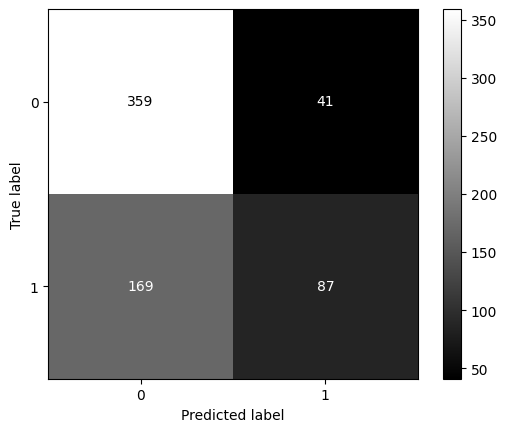

In [16]:
matrix = confusion_matrix(y_test,y_pred)
fig = plt.figure(figsize=(11,11))
cm = matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='gray')
plt.show()

# PARA VERIFICAR OVERFITTING

In [17]:
history = red.fit(X_train, y_train, epochs=9, batch_size=128,
                    validation_data=(X_test, y_test), verbose=1)

Epoch 1/9
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6853 - loss: 0.6092 - val_accuracy: 0.6768 - val_loss: 0.6189
Epoch 2/9
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6907 - loss: 0.5904 - val_accuracy: 0.6662 - val_loss: 0.6314
Epoch 3/9
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6835 - loss: 0.5783 - val_accuracy: 0.6692 - val_loss: 0.6102
Epoch 4/9
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6836 - loss: 0.5867 - val_accuracy: 0.6707 - val_loss: 0.6196
Epoch 5/9
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6802 - loss: 0.5887 - val_accuracy: 0.6890 - val_loss: 0.6219
Epoch 6/9
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6864 - loss: 0.5793 - val_accuracy: 0.6814 - val_loss: 0.6171
Epoch 7/9
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6946 - loss: 0.5768 - val_accuracy: 0.6723 - val_loss: 0.6147
Epoch 8/9
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6822 - loss: 0.5791 - val_accuracy: 0.6707 - val_loss:

In [18]:
y_pred = red.predict(X_test)
y_pred = np.round(y_pred)

score = accuracy_score(y_test,y_pred)
print(f'el accuracy es {score}')

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
el accuracy es 0.6798780487804879


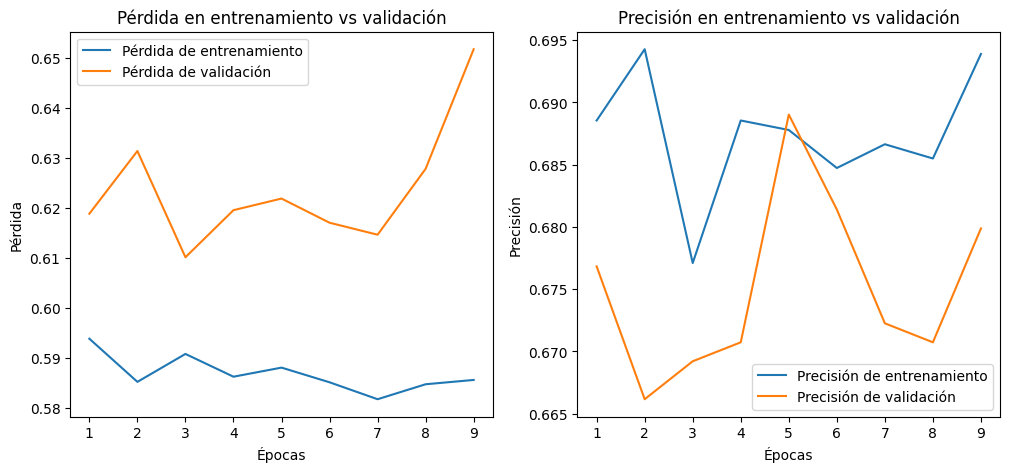

In [19]:
def plot_overfitting(history):
    epochs = range(1, len(history.history['loss']) + 1)

    plt.figure(figsize=(12, 5))

    # Pérdida
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'], label='Pérdida de entrenamiento')
    plt.plot(epochs, history.history['val_loss'], label='Pérdida de validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.title('Pérdida en entrenamiento vs validación')

    # Precisión
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['accuracy'], label='Precisión de entrenamiento')
    plt.plot(epochs, history.history['val_accuracy'], label='Precisión de validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()
    plt.title('Precisión en entrenamiento vs validación')

    plt.show()

# Llamar a la función para visualizar
plot_overfitting(history)